In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


classification dataset

In [2]:
X, y = make_classification(
    n_samples=400,
    n_features=250,
    n_informative=2,
    random_state=42
)

dataframe of data

In [3]:
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['Target'] = y
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_242,Feature_243,Feature_244,Feature_245,Feature_246,Feature_247,Feature_248,Feature_249,Feature_250,Target
0,-0.168217,0.481454,0.769205,-0.968667,1.481484,-0.802184,-0.237991,1.018925,-0.274833,-0.728497,...,0.848440,0.329849,-0.274129,-2.050531,-0.218681,0.795249,-0.107999,-0.845000,-0.168689,1
1,-0.040793,-2.000383,0.634799,0.095545,-0.051278,0.307810,-0.335843,1.147110,-0.394407,-1.321053,...,-0.416193,-0.434358,-0.235093,-0.258765,0.633243,-0.201080,0.303094,1.370079,-0.635089,0
2,-0.370698,2.342857,-1.139286,1.085672,-2.550026,0.908223,-0.194080,0.593337,-0.182242,-2.225935,...,1.475454,0.430014,1.458885,-0.608239,0.187069,0.012654,-0.185266,-0.584410,0.137758,0
3,-0.208223,-0.803409,-1.357823,-0.319096,0.390484,-0.678704,-1.155496,-0.947423,0.201048,-0.420934,...,-0.064809,-0.083181,-0.304065,1.153328,-0.686062,-0.359693,-0.052554,1.141455,-0.478692,0
4,-0.850677,-1.030512,-0.606379,0.321016,-0.777153,-0.925627,0.138227,0.790409,0.356066,-0.898413,...,-0.372120,-0.652259,-0.605035,0.507556,-0.164263,-0.233155,0.312346,-0.286987,0.442295,1


spliting data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    #  just transpose for consistency
X_train = X_train.T
X_test = X_test.T


    # Reshaping labels to be consistent (1 row, multiple samples)
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)


sigmoid function

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

cost function

In [6]:
def compute_cost(y, y_pred):
    m = y.shape[1]
    cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

prediction of logistic regression

In [7]:
def predict(w, b, X):
    z = np.dot(w.T, X) + b
    y_pred = sigmoid(z)
    return (y_pred > 0.5).astype(int)

training algorithm

In [8]:
def train(X, y, learning_rate, iterations=1000):
    n_features = X.shape[0]
    m = X.shape[1]
    w = np.zeros((n_features, 1))
    b = 0
    cost_list = []

    for i in range(iterations):
        z = np.dot(w.T, X) + b
        y_pred = sigmoid(z)
        cost = compute_cost(y, y_pred)

        dw = (1/m) * np.dot(X, (y_pred - y).T)
        db = (1/m) * np.sum(y_pred - y)

        w -= learning_rate * dw
        b -= learning_rate * db

        cost_list.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return w, b, cost_list

run model

In [9]:
w, b,cost = train(X_train, y_train, learning_rate=0.1, iterations=10000)

Iteration 0, Cost: 0.6931
Iteration 100, Cost: 0.1073
Iteration 200, Cost: 0.0650
Iteration 300, Cost: 0.0467
Iteration 400, Cost: 0.0364
Iteration 500, Cost: 0.0298
Iteration 600, Cost: 0.0253
Iteration 700, Cost: 0.0219
Iteration 800, Cost: 0.0193
Iteration 900, Cost: 0.0173
Iteration 1000, Cost: 0.0156
Iteration 1100, Cost: 0.0142
Iteration 1200, Cost: 0.0131
Iteration 1300, Cost: 0.0121
Iteration 1400, Cost: 0.0113
Iteration 1500, Cost: 0.0105
Iteration 1600, Cost: 0.0099
Iteration 1700, Cost: 0.0093
Iteration 1800, Cost: 0.0088
Iteration 1900, Cost: 0.0084
Iteration 2000, Cost: 0.0080
Iteration 2100, Cost: 0.0076
Iteration 2200, Cost: 0.0072
Iteration 2300, Cost: 0.0069
Iteration 2400, Cost: 0.0067
Iteration 2500, Cost: 0.0064
Iteration 2600, Cost: 0.0061
Iteration 2700, Cost: 0.0059
Iteration 2800, Cost: 0.0057
Iteration 2900, Cost: 0.0055
Iteration 3000, Cost: 0.0053
Iteration 3100, Cost: 0.0052
Iteration 3200, Cost: 0.0050
Iteration 3300, Cost: 0.0049
Iteration 3400, Cost: 0.00

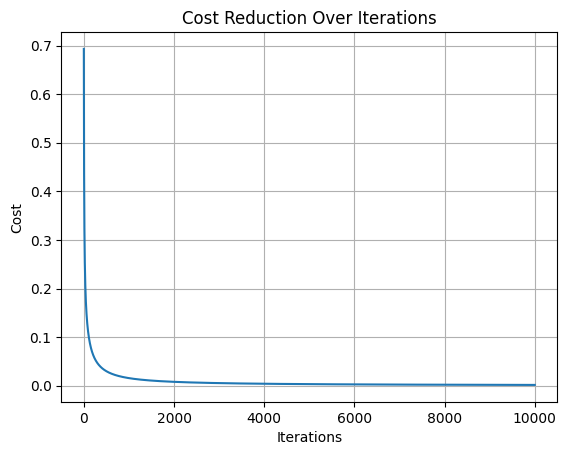

In [10]:
plt.plot(cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.grid(True)
plt.show()

In [11]:
def accuracy(y_true, y_pred):
    correct = 0
    total = y_true.shape[1]

    for i in range(total):
        if y_true[0][i] == y_pred[0][i]:
            correct += 1

    acc = (correct / total) * 100
    return acc


training accuracy

In [12]:
y_pred_train = predict(w, b, X_train)

testing accuracy

In [13]:
y_pred_test = predict(w, b, X_test)

In [14]:
print(f"Train Accuracy: {accuracy(y_train, y_pred_train):.2f}%")
print(f"Test Accuracy: {accuracy(y_test, y_pred_test):.2f}%")

Train Accuracy: 100.00%
Test Accuracy: 78.75%


cost function with regularization

In [15]:
def compute_cost_regularization(y, y_pred, lamda, w):
    m = y.shape[1]
    cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    reg_term = (lamda / (2 * m)) * np.sum(w ** 2)
    # Convert cost to a single number before returning it
    total_cost = cost + reg_term
    return total_cost

compute gradient

In [16]:
def train_reg(X, y,lamda, learning_rate, iterations=1000):
    n_features = X.shape[0]
    m = X.shape[1]
    w = np.zeros((n_features, 1))
    b = 0
    cost_list = []

    for i in range(iterations):
        z = np.dot(w.T, X) + b
        y_pred = sigmoid(z)
        # Correct the order of arguments when calling the function
        cost = compute_cost_regularization(y, y_pred, lamda, w)

        dw = (1/m) * np.dot(X, (y_pred - y).T) + (lamda / m) * w
        db = (1/m) * np.sum(y_pred - y)

        w -= learning_rate * dw
        b -= learning_rate * db

        cost_list.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return w, b, cost_list

In [17]:
w_reg, b_reg,cost_reg = train_reg(X_train, y_train,lamda=50, learning_rate=0.1, iterations=10000)

Iteration 0, Cost: 0.6931
Iteration 100, Cost: 0.3045
Iteration 200, Cost: 0.3042
Iteration 300, Cost: 0.3042
Iteration 400, Cost: 0.3042
Iteration 500, Cost: 0.3042
Iteration 600, Cost: 0.3042
Iteration 700, Cost: 0.3042
Iteration 800, Cost: 0.3042
Iteration 900, Cost: 0.3042
Iteration 1000, Cost: 0.3042
Iteration 1100, Cost: 0.3042
Iteration 1200, Cost: 0.3042
Iteration 1300, Cost: 0.3042
Iteration 1400, Cost: 0.3042
Iteration 1500, Cost: 0.3042
Iteration 1600, Cost: 0.3042
Iteration 1700, Cost: 0.3042
Iteration 1800, Cost: 0.3042
Iteration 1900, Cost: 0.3042
Iteration 2000, Cost: 0.3042
Iteration 2100, Cost: 0.3042
Iteration 2200, Cost: 0.3042
Iteration 2300, Cost: 0.3042
Iteration 2400, Cost: 0.3042
Iteration 2500, Cost: 0.3042
Iteration 2600, Cost: 0.3042
Iteration 2700, Cost: 0.3042
Iteration 2800, Cost: 0.3042
Iteration 2900, Cost: 0.3042
Iteration 3000, Cost: 0.3042
Iteration 3100, Cost: 0.3042
Iteration 3200, Cost: 0.3042
Iteration 3300, Cost: 0.3042
Iteration 3400, Cost: 0.30

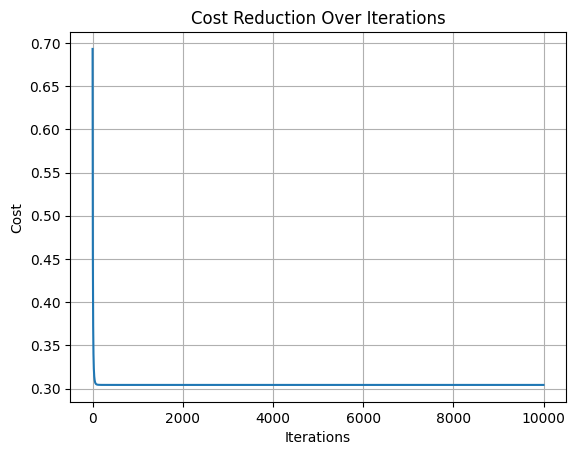

In [18]:
plt.plot(cost_reg)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.grid(True)
plt.show()

In [19]:
def accuracy_reg(y_true, y_pred):
    correct = 0
    total = y_true.shape[1]

    for i in range(total):
        if y_true[0][i] == y_pred[0][i]:
            correct += 1

    acc = (correct / total) * 100
    return acc


In [20]:
y_pred_train = predict(w_reg, b_reg, X_train)

In [21]:
y_pred_test = predict(w_reg, b_reg, X_test)

In [22]:
print(f"Train Accuracy: {accuracy_reg(y_train, y_pred_train):.2f}%")
print(f"Test Accuracy: {accuracy_reg(y_test, y_pred_test):.2f}%")

Train Accuracy: 97.81%
Test Accuracy: 86.25%
